## Here we perform a Machine learning task of predicting car brands based on their features using a decision tree classifier model.

### Import libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

### Load the dataset

In [6]:
filepath = "cars.csv"
df = pd.read_csv(filepath, na_values=['', ' '])

In [7]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


### Explore the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    258 non-null    float64
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [9]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [10]:
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

### Visualizatoin

<Figure size 1400x1200 with 0 Axes>

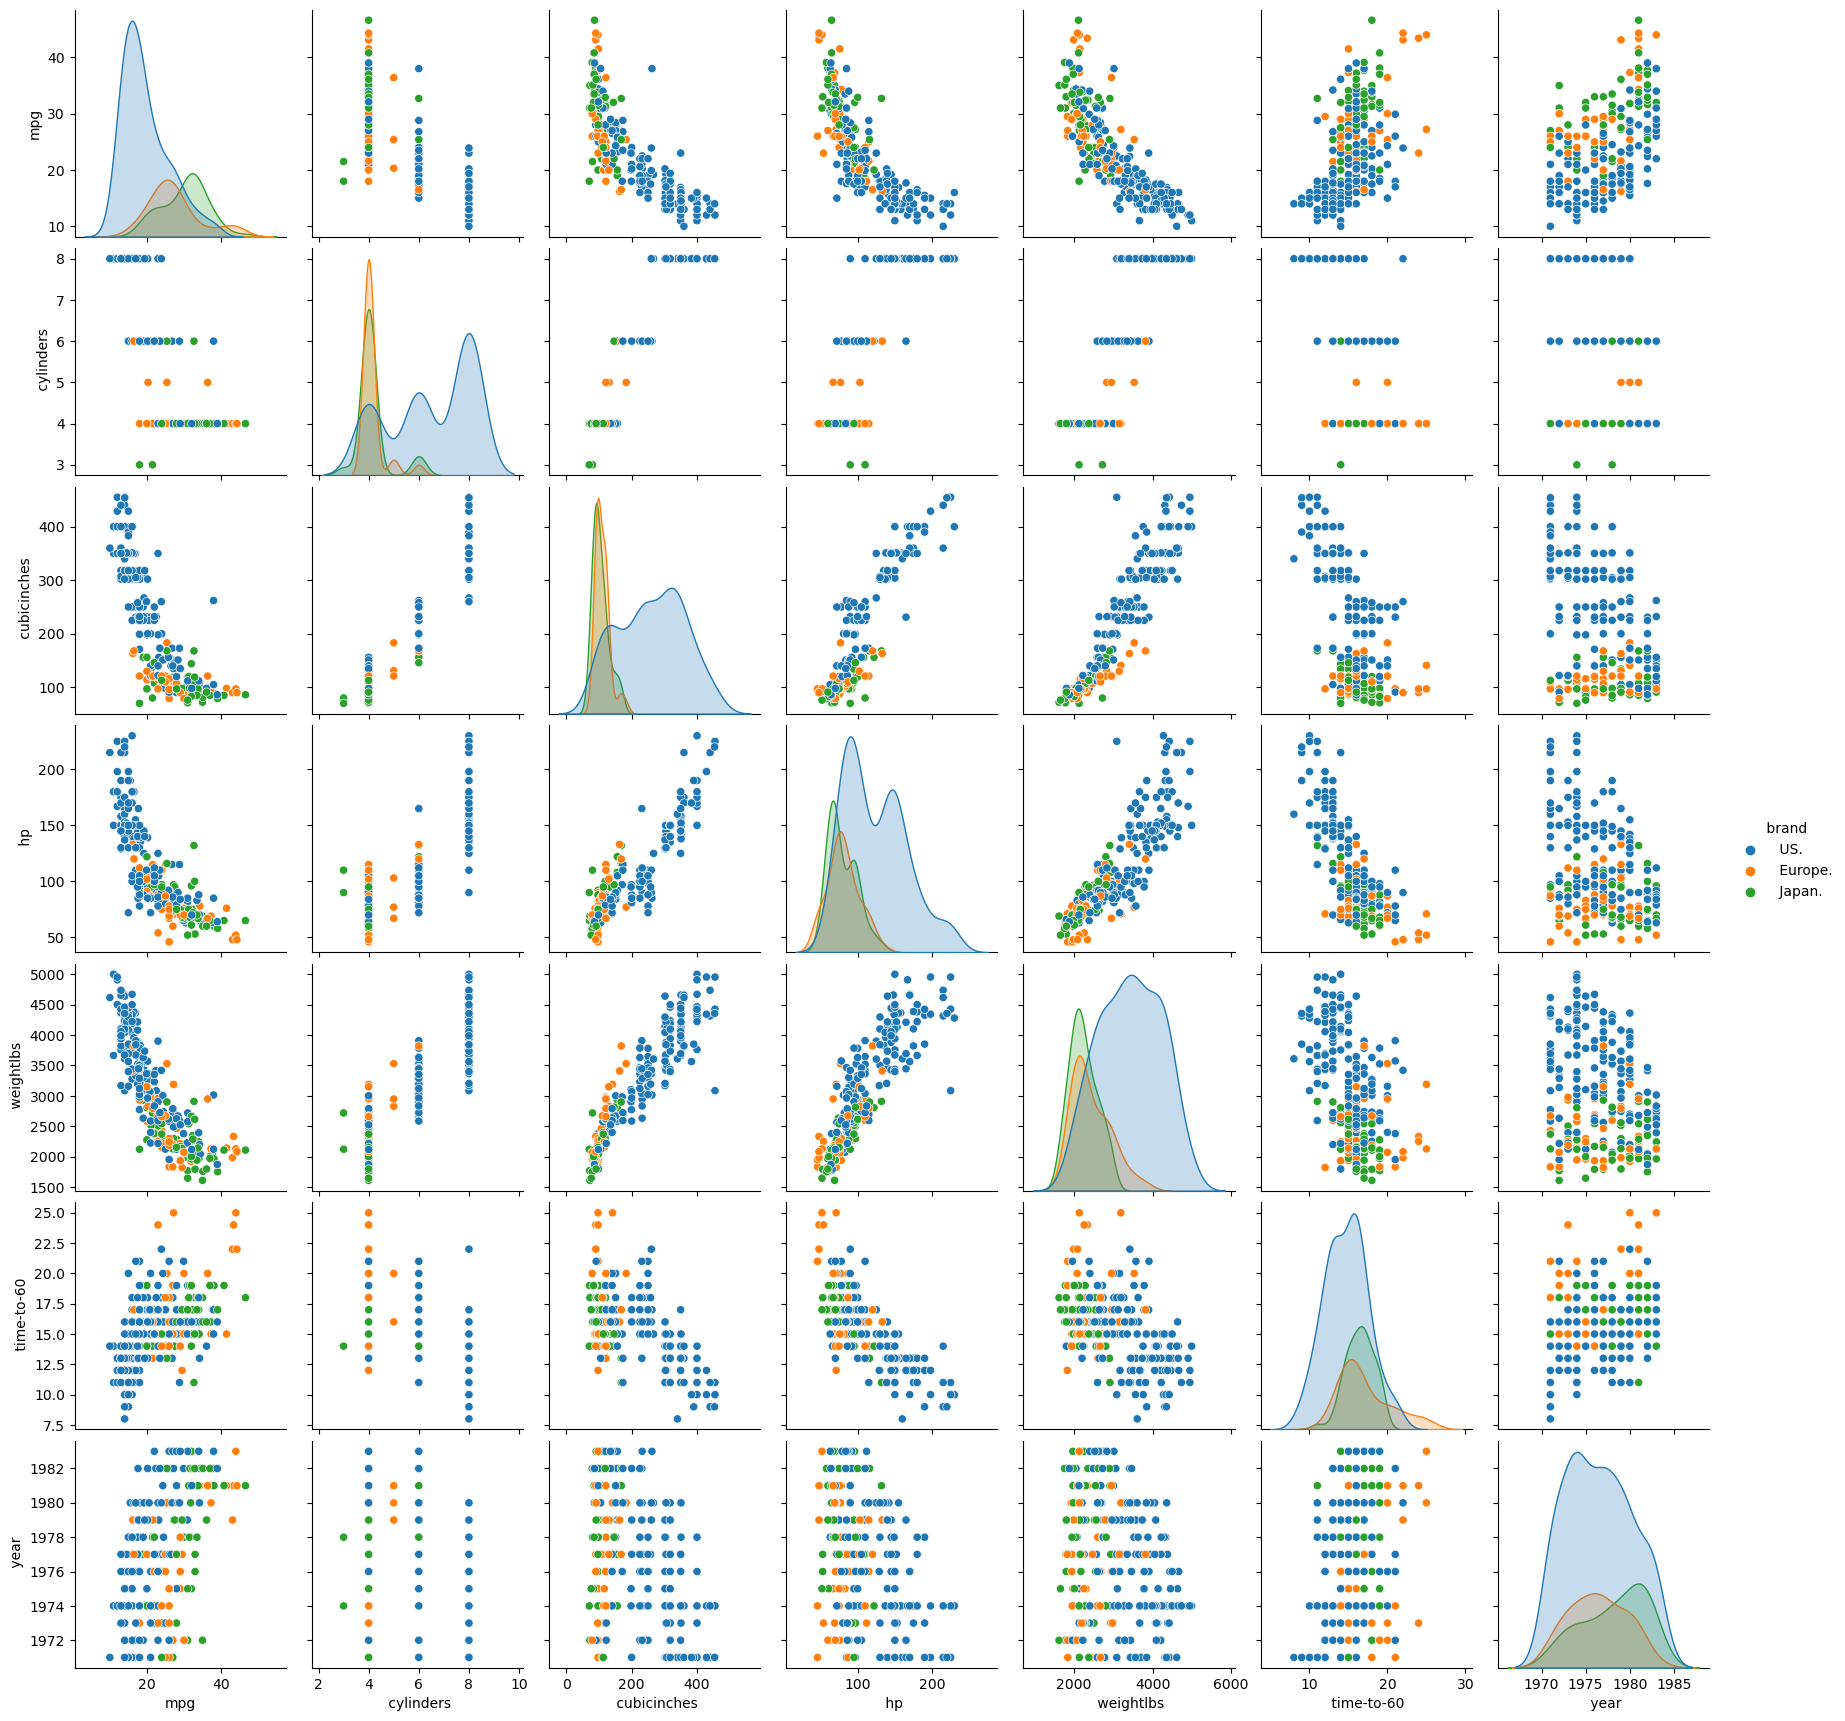

In [11]:
plt.figure(figsize=(14, 12))
sns.pairplot(df.dropna(), hue=' brand')
plt.show()

### Preprocess the data

In [12]:
df.dropna(inplace=True)
df[' cubicinches'] = df[' cubicinches'].astype(int)
df[' weightlbs'] = df[' weightlbs'].astype(int)

X = df.drop(' brand', axis=1)
y = df[' brand']

In [13]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the data

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [16]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 5, 7, 9]}
grid_search_dtc = GridSearchCV(dtc, params, cv=5)
grid_search_dtc.fit(X_train, y_train)
print(f"Best parameters: {grid_search_dtc.best_params_}")
dtc_best = grid_search_dtc.best_estimator_

Best parameters: {'max_depth': 7}


In [17]:
# Evaluate the model using cross-validation
scores = cross_val_score(dtc_best, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.7804878  0.87804878 0.82926829 0.68292683 0.75      ]
Mean cross-validation score: 0.7841463414634147


In [18]:
# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Evaluate the model on the test set
dtc.score(X_test, y_test)

0.8269230769230769

In [20]:
# Evaluate the model using cross-validation
scores = cross_val_score(dtc, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.75609756 0.85365854 0.85365854 0.73170732 0.75      ]
Mean cross-validation score: 0.7890243902439025


In [21]:
# Make predictions on the test set
y_predict = dtc.predict(X_test)
y_predict

array([' US.', ' US.', ' US.', ' US.', ' US.', ' US.', ' Europe.',
       ' Japan.', ' US.', ' US.', ' US.', ' Japan.', ' US.', ' US.',
       ' Europe.', ' US.', ' US.', ' Japan.', ' US.', ' Japan.', ' US.',
       ' Japan.', ' Europe.', ' US.', ' US.', ' Japan.', ' US.',
       ' Japan.', ' US.', ' US.', ' US.', ' US.', ' Japan.', ' US.',
       ' US.', ' Japan.', ' US.', ' Europe.', ' Japan.', ' US.', ' US.',
       ' Japan.', ' US.', ' US.', ' Europe.', ' US.', ' US.', ' US.',
       ' US.', ' Japan.', ' US.', ' US.'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8269230769230769

In [24]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score

,Actual,Predicted
233,US.,US.
6,US.,US.
82,US.,US.
211,US.,US.
120,Europe.,US.
190,US.,US.
247,Europe.,Europe.
170,Japan.,Japan.
9,Japan.,US.
31,US.,US.


### Visualizing the decision tree

In [25]:
from sklearn.tree import plot_tree

In [34]:
plt.figure(figsize=(120,100))

plt.title("Car Brand Prediction")

plot_tree(
    dtc, 
    max_depth=15, 
    feature_names=X_train, 
    class_names=y_train,
    filled=True, 
    rounded=True
)

plt.show()

### Visualize the predictions

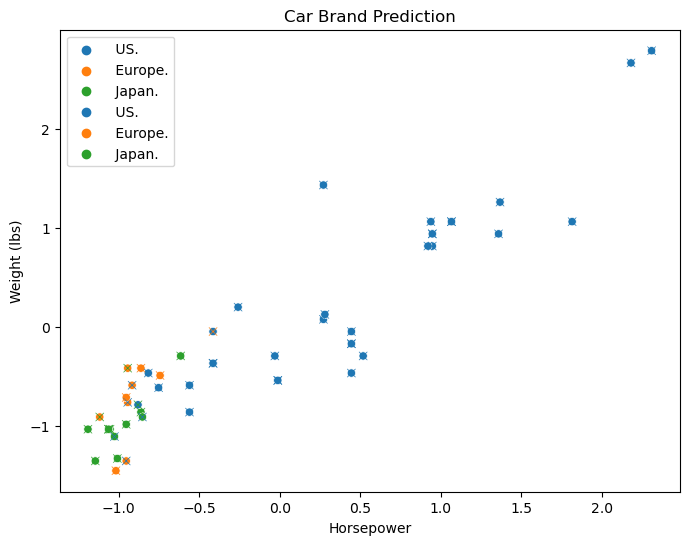

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_test)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_predict, marker='x')
plt.xlabel('Horsepower')
plt.ylabel('Weight (lbs)')
plt.title('Car Brand Prediction')
plt.show()